**CodeGenix - Mahindra Research Valley**

***Presented by:*** <br>
*Sai Pradyumnan Prem* <br>
*Yaswanthraj SP*<br>
*Alankriti Kalsi* <br>
*D Vamsidha*r <br>
*Steve Saju*

In [39]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [40]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
sia = SentimentIntensityAnalyzer()

In [42]:
df=pd.read_excel("All Car.xlsx")

In [43]:
df.head()

review_data = df[["Car_Name","Review_Text"]]

In [44]:
df.head()

,Car_Name,Review_Title,Review_Text
0,Hyundai Kona,Average car,"Nice car with good Hyundai service, but car is..."
1,Hyundai Kona,Hyundai Kona,Versatile and powerful car.The Hyundai Kona El...
2,Hyundai Kona,Want to buy Kona,I have driven Hyundai Kina Electric Premium pu...
3,Hyundai Kona,Hyundai Kona review,Not nice bro you should by kia carens or xuv70...
4,Hyundai Kona,Driving an environment friendly car,I test drove Kona EV. It is driver 's car with...


In [45]:
review_data.head()

,Car_Name,Review_Text
0,Hyundai Kona,"Nice car with good Hyundai service, but car is..."
1,Hyundai Kona,Versatile and powerful car.The Hyundai Kona El...
2,Hyundai Kona,I have driven Hyundai Kina Electric Premium pu...
3,Hyundai Kona,Not nice bro you should by kia carens or xuv70...
4,Hyundai Kona,I test drove Kona EV. It is driver 's car with...


In [46]:
#review_data=list(review_data["Review_Text"])

In [47]:
car_names = df["Car_Name"].unique()

car_names

array(['Hyundai Kona', 'KIA EV6', 'MERCEDES BENZ EQS',
       'MERCEDES BENS EQS', 'mercedes bens eqs', 'MG ZS EV',
       'TATA Nexon EV max', 'TATA NEXON EV MAX', 'TATA NEXON EV',
       'TATA Tigor EV', 'Tata Tigor'], dtype=object)

In [48]:
car_reviews_dict = {}

In [49]:
for car_name in car_names:
    car_reviews = review_data.loc[review_data['Car_Name'] == car_name, 'Review_Text'].tolist()
    car_dict = {'reviews': car_reviews}
    car_reviews_dict[car_name] = car_dict

In [ ]:
print(car_reviews_dict)

In [ ]:
for car_name in car_names:
  review = car_reviews_dict[car_name]['reviews']
  print(review)

In [19]:
performance_keywords = ['Performance','Power', 'Acceleration', 'Speed', 'Efficiency', 'Torque', 'Horsepower', 'Battery Life', 'Range Anxiety', 'Regenerative Braking', 'Throttle Response', 'Top Speed', 'Energy Consumption']
range_keywords = ['Range','Mileage', 'Distance', 'Driving Range', 'Battery Capacity', 'Charging Time', 'Range Estimation', 'Charge Port', 'Range Extender', 'Fast Charging', 'Home Charging']
ride_keywords = ['Ride','Suspension', 'Comfort', 'Smoothness', 'Bumps', 'Handling', 'Ride Height', 'Body Roll', 'Dampening', 'Vibration', 'Harshness']
handling_keywords = ['Handling','Agility', 'Responsiveness', 'Precision', 'Stability', 'Cornering', 'Steering Wheel', 'Traction Control', 'Suspension Tuning', 'Brake Balance', 'Chassis Rigidity']
braking_keywords = ['Braking','Stopping Power', 'Brake Feel', 'Brake Response', 'ABS', 'Regenerative Braking', 'Brake Pedal', 'Brake Fade', 'Brake Discs', 'Brake Pads', 'Brake Calipers']
steering_keywords = ['Streeing','Steering Feel', 'Steering Response', 'Accuracy', 'Weight', 'Electric Power Steering', 'Steering Ratio', 'Steering Column', 'Steering Wheel Controls', 'Lane Keep Assist', 'Adaptive Steering']
offroad_capability_keywords = ['Offroad','Ground Clearance', 'Four-Wheel Drive', 'Terrain Modes', 'Rock Crawling', 'Hill Descent Control', 'Skid Plates', 'Approach Angle', 'Departure Angle', 'Articulation', 'Wading Depth']
nvh_keywords = ['NVH','Noise', 'Vibration', 'Harshness', 'Cabin Quietness', 'Wind Noise', 'Road Noise', 'Engine Noise', 'Exhaust Note', 'Rattle', 'Squeak']
occupant_comfort_keywords = ['HVAC', 'Seating', 'Legroom', 'Headroom', 'Ergonomics', 'Heated Seats', 'Ventilated Seats', 'Massage Seats', 'Memory Seats', 'Seat Material']
visibility_and_package_keywords = ['Blind Spots', 'Visibility', 'Aesthetics', 'Cargo Space', 'Storage', 'Sunroof', 'Roof Rails', 'Tinted Glass', 'Power Liftgate', 'Automatic Headlights']
safety_keywords = ['Safety','Crash Test Ratings', 'Airbags', 'Collision Avoidance', 'Advanced Driver Assistance Systems', 'Autonomous Driving', 'Lane Departure Warning', 'Forward Collision Warning', 'Automatic Emergency Braking', 'Blind Spot Monitoring', 'Rear Cross Traffic Alert']
software_features_keywords= ['Software','Infotainment', 'Navigation', 'Connectivity', 'Voice Recognition', 'App Integration', 'Digital Instrument Cluster', 'Touchscreen', 'Wireless Charging', 'Over-the-Air Updates', 'Remote Control']

In [20]:
def section_creator(token_sent, keywords):
  return(" ".join([sentence for sentence in token_sent if any(keyword.lower() in sentence.lower() for keyword in keywords)]))

In [21]:
def calc_mean(score, length): 
  try:
      result = score / length
  except ZeroDivisionError:
      result = 0

  return result

In [22]:
result_car = {}

In [23]:
attributes = ["performance", "range", "ride", "handling", "braking", "steering", "offroad_capability", "nvh", "occupant_comfort", "visibility_and_package", "safety", "software_features"]

In [24]:
count_review=[]
count_total=0
count_with_attributes=0
count_positive_score=0
count_negative_score=0
count_neutral_score=0

In [25]:
def categorize_score(score):
    global count_positive_score
    global count_negative_score
    global count_neutral_score
    threshold = 0.0
    if score > threshold:
        count_positive_score+=1
    elif score < threshold:
        count_negative_score+=1
    else:
        count_neutral_score+=1

In [26]:
for car_name in car_names:
  review_table=dict()
  reviews =car_reviews_dict[car_name]['reviews']

  calculations = dict()

  for attribute in attributes:
    if attribute != "":
      calculations[attribute + "_score"] = 0
      calculations[attribute + "_count"] = 0
 
  for review in reviews:
    token_sent=nltk.sent_tokenize(review)
    count_total+=len(token_sent)

    for attribute in attributes:
      if attribute != "":
        calculations[attribute + "_section"] = section_creator(token_sent, eval(attribute + "_keywords")) 
        if calculations[attribute + "_section"] != "":
          calculations[attribute + "_score"] += sia.polarity_scores(calculations[attribute + "_section"])['compound']
          calculations[attribute + "_count"] += 1
          categorize_score(calculations[attribute + "_score"])
  
  for attribute in attributes:
    review_table[attribute]=calculations[attribute + "_count"]
    count_with_attributes+=calculations[attribute + "_count"]
    calculations[attribute + "_mean"] = calc_mean(calculations[attribute + "_score"], calculations[attribute + "_count"])
  count_review.append(review_table)
  result_car[car_name] = calculations

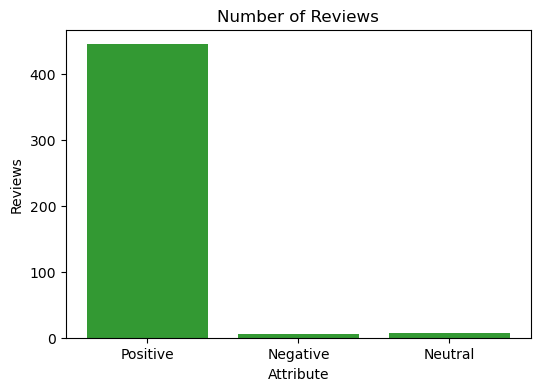

In [27]:
# create some sample data
data = pd.DataFrame({
    'Attribute': ['Positive', 'Negative', 'Neutral'],
    'Reviews': [count_positive_score, count_negative_score, count_neutral_score]
})

# create a bar chart
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(data['Attribute'], data['Reviews'], color='g', alpha=0.8)

# add labels to the chart
ax.set_title('Number of Reviews')
ax.set_xlabel('Attribute')
ax.set_ylabel('Reviews')


# display the chart
plt.show()


In [28]:
print(count_total)
print(count_with_attributes)

1100
457


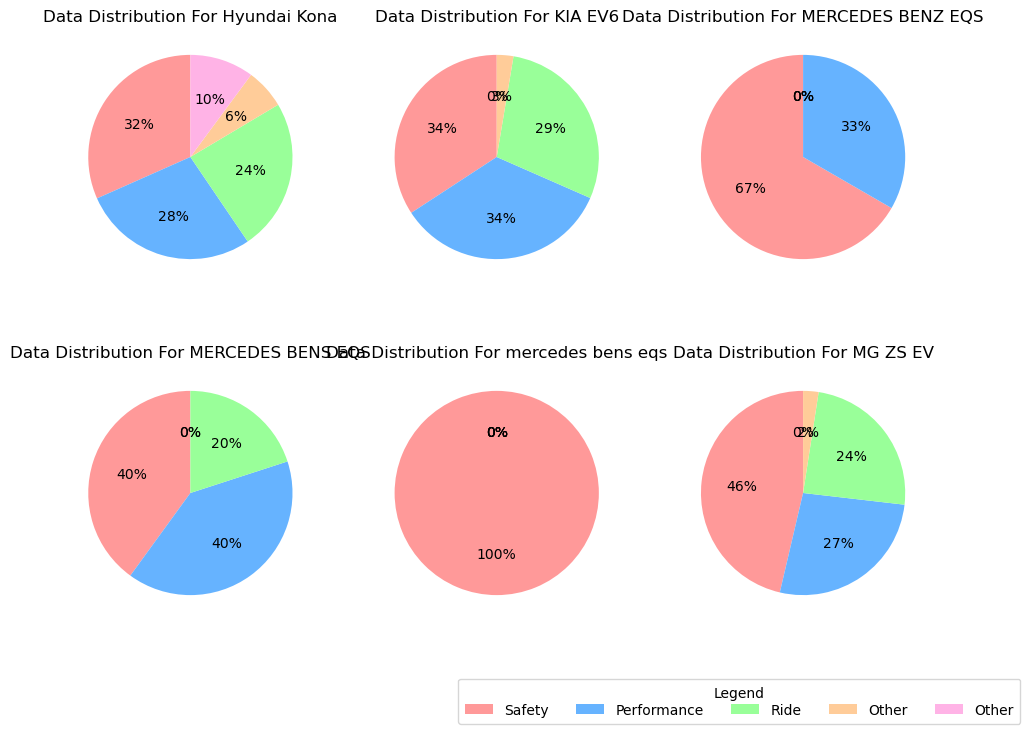

In [29]:
#for i in range(len(car_names)):
#  sizes = []
#  for attribute in attributes:
#    sizes.append(count_review[i][attribute])
#  draw_viz(car_names[i],sizes)
#
data_viz=[]
for i in range(len(car_names)):
  sizes = []
  for attribute in attributes:
    sizes.append(count_review[i][attribute])
  data_viz.append(sizes)


labels = ["Performance", "Range", "Ride", "Handling", "Braking", "Steering", "Offroad_capability", "NVH", "Occupant_comfort", "Visibility_and_package", "Safety", "Software_features"]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6','#b3b3ff',
            '#ffccff','#99ccff','#cc99ff','#cccccc','#ffb3b3','#b3ffb3']

fig, axs = plt.subplots(2, 3)

for i in range(2):
    for j in range(3):
        index = i * 3 + j
        data, labels = zip(*sorted(zip(data_viz[index], labels), reverse=True))
        # Define the number of values to show
        n = 4
        # Group the remaining values into an "other" category
        data_other = sum(data[n:])
        label_other = 'Other'
        # Combine the top n values with the "other" category
        data = list(data[:n]) + [data_other]
        labels = list(labels[:n]) + [label_other]

        axs[i, j].pie(data, labels=['']*len(labels), colors=colors, autopct='%1.0f%%', startangle=90)
        axs[i, j].set_title(f'Data Distribution For {car_names[index]}')
        axs[i, j].set_aspect('equal')  # Set the aspect ratio to be equal
        axs[i, j].figure.set_size_inches(11.2, 8)  # Set the figsize of the subplot

        #axs[i, j].legend(labels,title="Legend", loc="center", bbox_to_anchor=(0.5, -0.2), ncol=3, labelspacing=0.5, borderpad=1)

# Adjust the layout
plt.legend(labels,title="Legend", loc="upper center", bbox_to_anchor=(0.25, -0.2), ncol=6, labelspacing=0.25, borderpad=0.5)

# Show the plot
plt.show()



In [30]:
print(review_table)

{'performance': 45, 'range': 53, 'ride': 57, 'handling': 5, 'braking': 5, 'steering': 0, 'offroad_capability': 3, 'nvh': 4, 'occupant_comfort': 4, 'visibility_and_package': 1, 'safety': 36, 'software_features': 4}


In [ ]:
#for key, value in result_car.items():
#  print(value)
#  break
print(result_car)

In [32]:
for key,value in result_car.items():
   for attribute in attributes:
     value[attribute+'_mean']="{:.2f}".format((value[attribute+'_mean']+1)/2)


In [33]:
for key,value in result_car.items():
  print(key)
  for attribute in attributes:
     print(value[attribute+'_mean'])

Hyundai Kona
0.78
0.67
0.84
0.94
0.50
0.50
0.50
0.50
0.63
0.66
0.91
0.59
KIA EV6
0.82
0.81
0.84
0.94
0.50
0.50
0.50
0.50
0.95
0.50
0.89
0.65
MERCEDES BENZ EQS
0.73
0.75
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
MERCEDES BENS EQS
0.83
0.71
0.92
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
mercedes bens eqs
0.50
0.82
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
MG ZS EV
0.82
0.82
0.81
0.50
0.77
0.50
0.61
0.50
0.35
0.61
0.91
0.42
TATA Nexon EV max
0.80
0.72
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.90
0.91
TATA NEXON EV MAX
0.77
0.79
0.89
0.50
0.87
0.50
0.50
0.50
0.50
0.50
0.72
0.50
TATA NEXON EV
0.81
0.73
0.82
0.81
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
TATA Tigor EV
0.89
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
0.50
Tata Tigor
0.77
0.75
0.85
0.84
0.74
0.50
0.86
0.48
0.85
0.96
0.90
0.75


In [34]:
result_car

{'Hyundai Kona': {'performance_score': 14.0953,
  'performance_count': 25,
  'range_score': 7.435099999999999,
  'range_count': 22,
  'ride_score': 12.8147,
  'ride_count': 19,
  'handling_score': 0.8885,
  'handling_count': 1,
  'braking_score': 0.0,
  'braking_count': 1,
  'steering_score': 0,
  'steering_count': 0,
  'offroad_capability_score': 0,
  'offroad_capability_count': 0,
  'nvh_score': 0,
  'nvh_count': 0,
  'occupant_comfort_score': 0.7585999999999999,
  'occupant_comfort_count': 3,
  'visibility_and_package_score': 0.3182,
  'visibility_and_package_count': 1,
  'safety_score': 4.0788,
  'safety_count': 5,
  'software_features_score': 0.3612,
  'software_features_count': 2,
  'performance_section': '',
  'range_section': '',
  'ride_section': '',
  'handling_section': '',
  'braking_section': '',
  'steering_section': '',
  'offroad_capability_section': '',
  'nvh_section': '',
  'occupant_comfort_section': '',
  'visibility_and_package_section': '',
  'safety_section': ''

In [35]:
final_result_car=dict()
for key,value in result_car.items():
  temp_dict=dict()
  for attribute in attributes:
    temp_dict[attribute.upper()]=float(value[attribute+'_mean'])
    final_result_car[key]=temp_dict

In [36]:
final_result_car

{'Hyundai Kona': {'PERFORMANCE': 0.78,
  'RANGE': 0.67,
  'RIDE': 0.84,
  'HANDLING': 0.94,
  'BRAKING': 0.5,
  'STEERING': 0.5,
  'OFFROAD_CAPABILITY': 0.5,
  'NVH': 0.5,
  'OCCUPANT_COMFORT': 0.63,
  'VISIBILITY_AND_PACKAGE': 0.66,
  'SAFETY': 0.91,
  'SOFTWARE_FEATURES': 0.59},
 'KIA EV6': {'PERFORMANCE': 0.82,
  'RANGE': 0.81,
  'RIDE': 0.84,
  'HANDLING': 0.94,
  'BRAKING': 0.5,
  'STEERING': 0.5,
  'OFFROAD_CAPABILITY': 0.5,
  'NVH': 0.5,
  'OCCUPANT_COMFORT': 0.95,
  'VISIBILITY_AND_PACKAGE': 0.5,
  'SAFETY': 0.89,
  'SOFTWARE_FEATURES': 0.65},
 'MERCEDES BENZ EQS': {'PERFORMANCE': 0.73,
  'RANGE': 0.75,
  'RIDE': 0.5,
  'HANDLING': 0.5,
  'BRAKING': 0.5,
  'STEERING': 0.5,
  'OFFROAD_CAPABILITY': 0.5,
  'NVH': 0.5,
  'OCCUPANT_COMFORT': 0.5,
  'VISIBILITY_AND_PACKAGE': 0.5,
  'SAFETY': 0.5,
  'SOFTWARE_FEATURES': 0.5},
 'MERCEDES BENS EQS': {'PERFORMANCE': 0.83,
  'RANGE': 0.71,
  'RIDE': 0.92,
  'HANDLING': 0.5,
  'BRAKING': 0.5,
  'STEERING': 0.5,
  'OFFROAD_CAPABILITY': 0.5,

In [37]:
car_reviews_df=pd.DataFrame(final_result_car)
car_reviews_df.to_csv('Final_Output.csv', index=None)
df_new = pd.read_csv('Final_Output.csv')
GFG = pd.ExcelWriter('Final_Output.xlsx')
df_new.to_excel(GFG, index=True)
GFG.save()

C:\Users\HP\AppData\Local\Temp\ipykernel_8992\578591230.py:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  GFG.save()


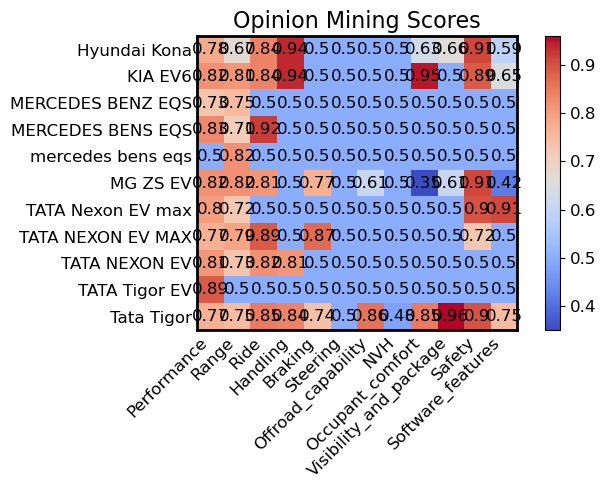

In [38]:
# Define the data for the heatmap
data = []

for key,value in result_car.items():
  temp_list=[]
  for attribute in attributes:
    temp_list.append(float(value[attribute+'_mean']))
  data.append(temp_list)

# Define the row labels (car names)
rows = car_names

# Define the column labels (attribute names)
columns = ["Performance", "Range", "Ride", "Handling", "Braking", "Steering", "Offroad_capability", "NVH", "Occupant_comfort", "Visibility_and_package", "Safety", "Software_features"]

# Create the heatmap
# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(data, cmap='coolwarm')

# Add the colorbar
cbar = ax.figure.colorbar(im, ax=ax, fraction=0.03, pad=0.04)
cbar.ax.tick_params(labelsize=12)

# Set the tick labels for the row and column axes
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(rows)))
ax.set_xticklabels(columns, fontsize=12, rotation=45, ha="right")
ax.set_yticklabels(rows, fontsize=12)

# Loop over the data and add text annotations
for i in range(len(rows)):
    for j in range(len(columns)):
        text = ax.text(j, i, data[i][j], ha="center", va="center", color="black", fontsize=12)

# Add a title
ax.set_title("Opinion Mining Scores", fontsize=16)

# Set the plot background color
ax.set_facecolor('#F6F6F6')

# Set the spines width
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Remove the ticks
ax.tick_params(axis='both', which='both', length=0)

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()

